In [ ]:
# Plots to generate figures for report

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.image as mpimg

In [2]:
sns.set_palette('Paired')

# Load the dataset
file_path = 'result.csv'
df = pd.read_csv(file_path)

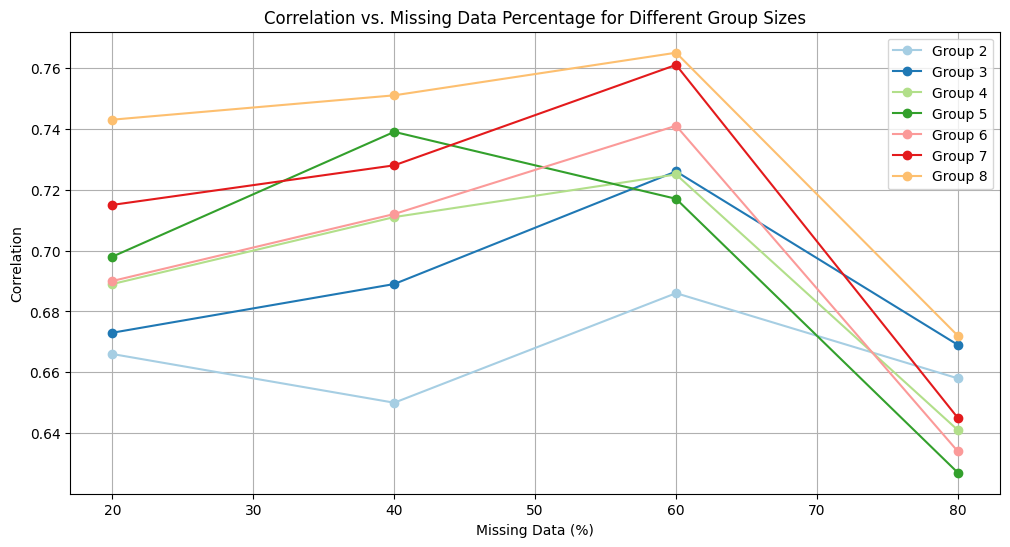

In [3]:
# Filtering the dataframe for rows where Imputation is True
df_imputation = df[df['Imputation'] == True]

# Plotting Correlation vs Missing Data for different group sizes
plt.figure(figsize=(12, 6))

for group in df_imputation['Group size'].unique():
    group_data = df_imputation[df_imputation['Group size'] == group]
    plt.plot(group_data['Missing Data'], group_data['Correlation'], marker='o', label=f'Group {group}')

plt.xlabel('Missing Data (%)')
plt.ylabel('Correlation')
plt.title('Correlation vs. Missing Data Percentage for Different Group Sizes')
plt.legend()
plt.grid(True)
plt.show()


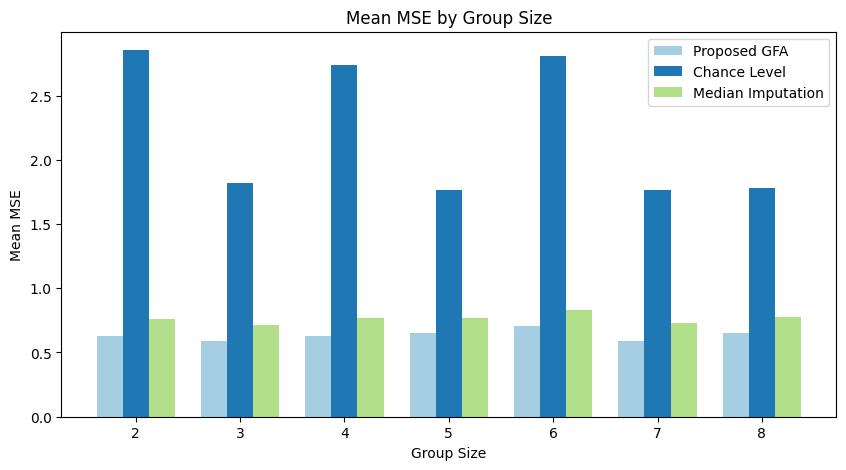

In [4]:
# Plot 1: Increasing group size vs. MSE
group_sizes = df['Group size'].unique()  # Get the unique group sizes
mse_values = []  # List to hold the average MSE values for each group size
chance_level_mse_values = []  # List to hold the average chance level MSE values for each group size
imputation_mse_values = []  # List to hold the average imputation MSE values for each group size

for size in group_sizes:
    mse_values.append(df[df['Group size'] == size]['MSE'].mean())
    chance_level_mse_values.append(df[df['Group size'] == size]['MSE_chance_level'].mean())
    imputation_mse_values.append(df[df['Group size'] == size]['MSE_imputation'].mean())

# The position of the bars on the x-axis
r1 = np.arange(len(mse_values))
r2 = [x + 0.25 for x in r1]
r3 = [x + 0.25 for x in r2]

# Plotting the bars
plt.figure(figsize=(10, 5))
plt.bar(r1, mse_values, width=0.25, label='Proposed GFA')
plt.bar(r2, chance_level_mse_values, width=0.25, label='Chance Level')
plt.bar(r3, imputation_mse_values,  width=0.25, label='Median Imputation')

plt.xlabel('Group Size')
plt.ylabel('Mean MSE')
plt.xticks([r + 0.25 for r in range(len(mse_values))], group_sizes)
plt.legend()
plt.title('Mean MSE by Group Size')
plt.show()

In [5]:
# # Filtering data for Group 8
# group_8_data = df[df['Group size'] == 8].sort_values(by='Missing Data')

# # Initialize lists to store the MSE values for different missing data percentages
# mse_values = []
# chance_level_mse_values = []
# imputation_mse_values = []

# # Assuming 'MissingData' is the column with missing data percentages
# missing_data_percentages = sorted(group_8_data['Missing Data'].unique())

# for percentage in missing_data_percentages:
#     # Filter the data for each missing data percentage
#     data_at_percentage = group_8_data[group_8_data['Missing Data'] == percentage]
#     mse_values.append(data_at_percentage['MSE'].mean())
#     chance_level_mse_values.append(data_at_percentage['MSE_chance_level'].mean())
#     imputation_mse_values.append(data_at_percentage['MSE_imputation'].mean())

# # The positions of the bars on the x-axis
# r1 = np.arange(len(mse_values))
# r2 = [x + 0.25 for x in r1]
# r3 = [x + 0.25 for x in r2]

# # Plotting the bars
# plt.figure(figsize=(10, 5))
# plt.bar(r1, mse_values,  width=0.25, label='MSE')
# plt.bar(r2, chance_level_mse_values,  width=0.25, label='Chance Level MSE')
# plt.bar(r3, imputation_mse_values,  width=0.25, label='Imputation MSE')

# plt.xlabel('Missing Data Percentage')
# plt.ylabel('MSE')
# plt.xticks([r + 0.25 for r in range(len(mse_values))], missing_data_percentages)
# plt.legend()
# plt.title('MSE by Missing Data Percentage for 8 Groups')
# plt.show()


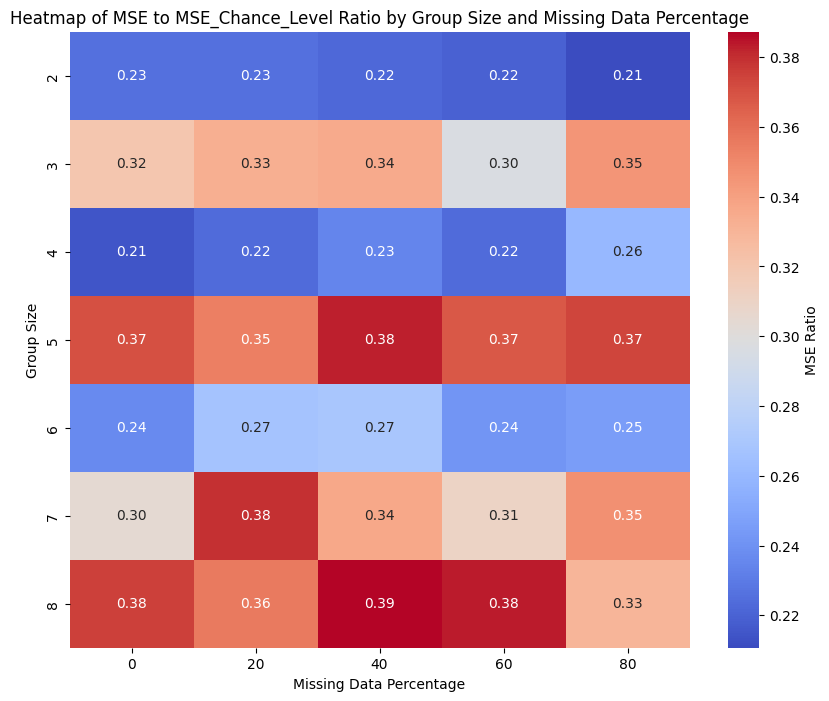

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the ratio of MSE_chance_level to MSE and add it as a new column
df['MSE_Ratio'] =  df['MSE'] / df['MSE_chance_level']

# Create a pivot table with group size as rows, missing data percentage as columns, and MSE_Ratio as values
pivot_table = df.pivot(index='Group size', columns='Missing Data', values='MSE_Ratio')

# Plot heatmap
plt.figure(figsize=(10, 8))  # You can adjust the size as needed
sns.heatmap(pivot_table, annot=True, fmt=".2f", cmap="coolwarm", cbar_kws={'label': 'MSE Ratio'})
plt.title("Heatmap of MSE to MSE_Chance_Level Ratio by Group Size and Missing Data Percentage")
plt.xlabel("Missing Data Percentage")
plt.ylabel("Group Size")

# Show the plot
plt.show()
